In [1]:
import json


with open("/workspace/chunky-experiments/transcripts/final-model_data", "r") as f:
    data = [json.loads(line) for line in f]


In [2]:
from collections import defaultdict
import numpy as np
lengths = defaultdict(list)

for item in data:
    gen_text = item["generation"]

    lengths[(item["domain"], item["language"])].append(len(gen_text))

for (domain, language), local_lengths in lengths.items():
    print(domain, language, np.mean(local_lengths), np.std(local_lengths))

disease en 314.5905172413793 57.17886708489223
city en 277.7413793103448 60.78500420357424
city de 226.11637931034483 40.2475560276764
disease de 220.63146551724137 43.688552429320666


(<Figure size 1200x800 with 1 Axes>,
 <Axes: title={'center': 'Length Distributions by Domain and Language'}, xlabel='Length', ylabel='Density'>)

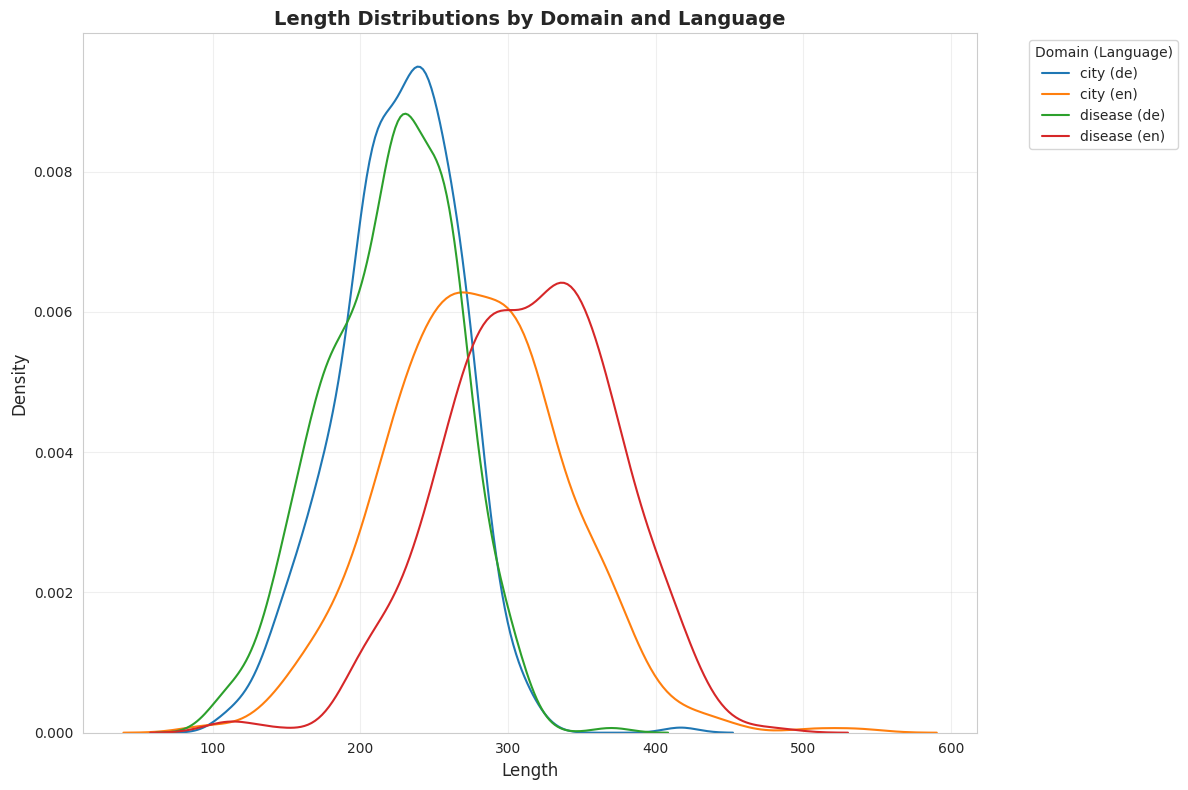

In [13]:
import pandas as pd
def plot_length_distributions(lengths_dict, figsize=(12, 8), style='whitegrid'):
    """
    Plot KDE distributions for length data organized by domain and language.
    
    Args:
        lengths_dict: Dict with keys (domain, language) and values as lists of numbers
        figsize: Tuple for figure size
        style: Seaborn style to use
    """
    # Set the style
    sns.set_style(style)
    
    # Convert the dict to a pandas DataFrame for easier plotting
    data = []
    for (domain, language), lengths in lengths_dict.items():
        for length in lengths:
            data.append({
                'Domain': domain,
                'Language': language,
                'Length': length
            })
    
    df = pd.DataFrame(data)
    
    # Create the plot
    fig, ax = plt.subplots(figsize=figsize)
    
    # Create KDE plots for each domain-language combination
    for (domain, language), group_data in df.groupby(['Domain', 'Language']):
        label = f"{domain} ({language})"
        sns.kdeplot(data=group_data['Length'], label=label, ax=ax)
    
    # Customize the plot
    ax.set_xlabel('Length', fontsize=12)
    ax.set_ylabel('Density', fontsize=12)
    ax.set_title('Length Distributions by Domain and Language', fontsize=14, fontweight='bold')
    ax.legend(title='Domain (Language)', bbox_to_anchor=(1.05, 1), loc='upper left')
    ax.grid(True, alpha=0.3)
    
    # Adjust layout to prevent label cutoff
    plt.tight_layout()
    
    return fig, ax

plot_length_distributions(lengths)

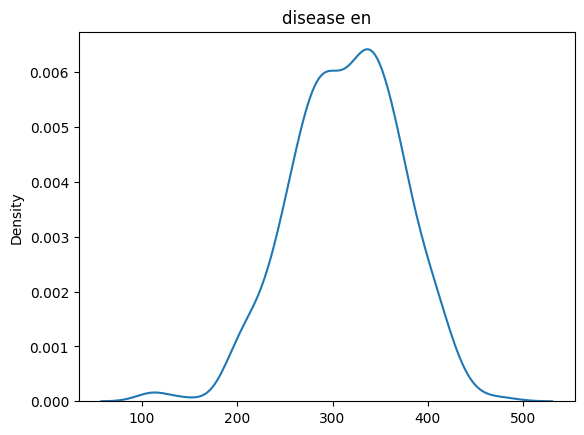

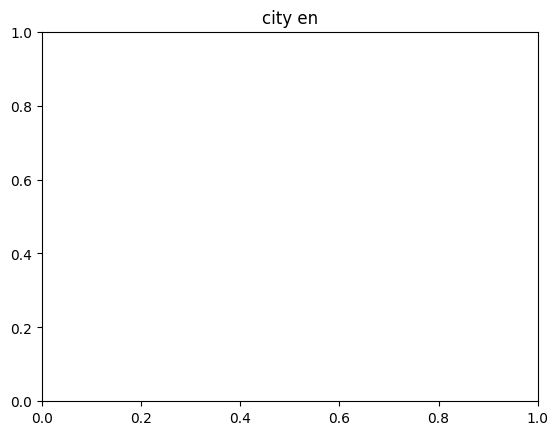

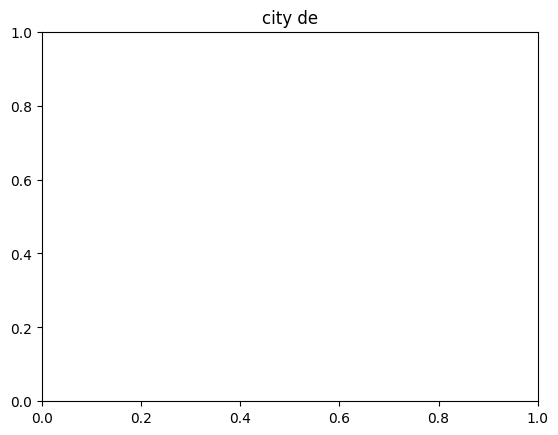

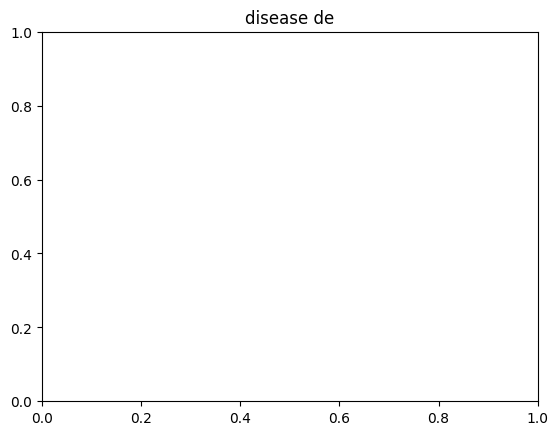

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt

ax = plt.gca()
for (domain, language), local_lengths in lengths.items():
    # Add a name to the plot
    plt.title(f"{domain} {language}")
    sns.kdeplot(local_lengths, ax=ax)
    plt.show()



